## Ford Go Bike Data Visualization and Analysis Project


## Table Contents:

1) Introduction 

2) Gathring data

3) Data Assessment

4) Cleaning

5) Univariate Exploration and Analysis

6) Bivariate Exploration and Analysis

7) Multivariate Exploration and Analysis

8) Conclusions


## Introduction:

Ford GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across San Francisco, East Bay and San Jose. People need to rent bikes with convenience .Bikes are fun and affordable transport to move freely in the city.It aslo offers Single Ride which cost approximatly two dollars per day which is awesome for one way trip.In addition to that there are a lot of option such as Monthly Memberships which cost around fifteen dollars per month,that is a great deal for locals and workers who want to save time.Furthermore Access Pass tarrif is 10 dollars which is ideal for exploring.

## Gather

In [5]:
# import useful library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
% matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker as tick

In [6]:
# explore our data
df_bike= pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
df_bike.shape

(183412, 16)

 ## Assess

In [8]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


The features included in the dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

In [9]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
sum(df_bike.duplicated())

0

In [11]:
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
df_bike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

## Data Wrangling: 
#### Quality issues:
1) Start time and end time are object not Timestamp

2) Member_birth_year and member_gender columns have missing values

3) Start_time and end_time should be data type datetime

4) weekday and hours column should be added for analysis in seperate columns

5) Member_birth_year should be data type int

6) Calculate the age of the user and put it in a new column

7) Member_age outliers should be removed.

8) User_type, member_gender, weekday and hour should be categorical variables

9) Duration_sec has huge values, theses values maybe are outlier because users forgot to log off after using the bike.

10) Drop unwanted Columns.

## Cleaning

In [13]:
#here making copy of data to clean it
df_clean= df_bike.copy()

## Define:
Convert start time and end time object to timestamp

## Code:

In [14]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [15]:
#Test
df_clean[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
start_time    183412 non-null datetime64[ns]
end_time      183412 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


## Define:
Change: 
1.usertype and bike share for all trips to be category.
      
2.duration_sec to be in minutes.

3.Divide start time into 3 values(start_date,start_hour_of_day and start_day_of_week) 



## Code:

In [16]:
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

## Define: 
change:

1.member_birth_year should be data type int

2.Gender  to be categorical

## Code:

In [17]:
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

In [18]:
# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
duration_min               183412 non-null float64
start_date

In [19]:
#Test
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hour_of_day,start_day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday


## Define:
Calculate age of user

### Code:

In [20]:
# substract the member_birth_year from the current year=2019
df_clean['user_age'] = 2019-df_clean['member_birth_year']

In [21]:
df_clean = df_clean[df_clean['user_age']<=60]

In [22]:
#Find average age 
df_clean['user_age'].mean()

33.520781740736638

In [23]:
df_clean.user_age.describe()

count    171617.000000
mean         33.520782
std           8.953751
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          60.000000
Name: user_age, dtype: float64

In [24]:
df_clean['biker_age'] = df_clean['user_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [25]:
#Test
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hour_of_day,start_day_of_week,user_age,biker_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,869.75,2019-02-28,17,Thursday,35.0,30 - 40


In [26]:
# Drop unwanted columns.
df_clean = df_clean.drop(['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1)

In [27]:
# Test 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171617 entries, 0 to 183411
Data columns (total 13 columns):
duration_sec         171617 non-null int64
start_time           171617 non-null datetime64[ns]
end_time             171617 non-null datetime64[ns]
bike_id              171617 non-null object
user_type            171617 non-null category
member_birth_year    171617 non-null float64
member_gender        171617 non-null category
duration_min         171617 non-null float64
start_date           171617 non-null object
start_hour_of_day    171617 non-null object
start_day_of_week    171617 non-null object
user_age             171617 non-null float64
biker_age            171617 non-null object
dtypes: category(2), datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 16.0+ MB


In [28]:
#Save my work of the clean master dataset
df_clean.to_csv('201902-gofordbike_master.csv', index = False)

## Visualization 

In [29]:
#Read new CSV file
df2 = pd.read_csv('201902-gofordbike_master.csv')
df2.head(2)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,duration_min,start_date,start_hour_of_day,start_day_of_week,user_age,biker_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984.0,Male,869.75,2019-02-28,17,Thursday,35.0,30 - 40
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972.0,Male,1030.90,2019-02-28,12,Thursday,47.0,40 - 50


## How long does it take to finish a bike trips in seconds ?

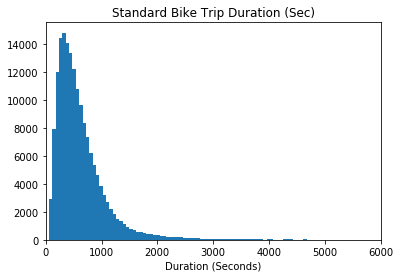

In [30]:
bin_edges = np.arange(0, df2['duration_sec'].max() + 100 , 60)
plt.hist(data = df2 , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,6000)
plt.title('Standard Bike Trip Duration (Sec)')
plt.xlabel('Duration (Seconds)');
plt.savefig('img01.png');

####  The maximum 16000 bike trip  and the average duration is between 5000 and 6000 seconds.I want to look in this data furthermore but in minutes.

## Average bike trips vs minutes ?

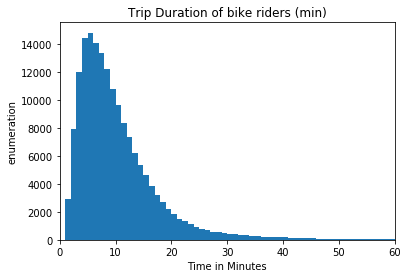

In [31]:
bins = np.arange(0, df2['duration_min'].max()+1, 1)
plt.hist(data = df2, x = 'duration_min', bins = bins)
plt.xlim([0,60])
plt.title('Trip Duration of bike riders (min)')
plt.xlabel('Time in Minutes')
plt.ylabel('enumeration')
plt.show()
plt.savefig('img02.png');

#### As we can see here, the average trip duration is  between 5 and 1o minutes, I need to look to log scale in order to know the accurate trip duration average .

In [32]:
df2.duration_min.describe()

count    171617.000000
mean         11.724008
std          27.567113
min           1.016667
25%           5.383333
50%           8.500000
75%          13.116667
max        1409.133333
Name: duration_min, dtype: float64

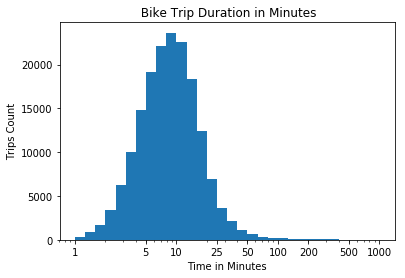

In [33]:
#For better understanding i will transform figure to log figure
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 5, 10,25,50, 100,200,500,1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df2 , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Time in Minutes');
plt.title(' Bike Trip Duration in Minutes');
plt.ylabel('Trips Count');
plt.savefig('img03.png');

#### As we can see here, the average trip duration is  between 5 and 15 minutes with the majority of trips  took 10 minutes to finish. In addition to that some users took around 100 and even 300 minutes to finish the trip.

## What is the average user_age?

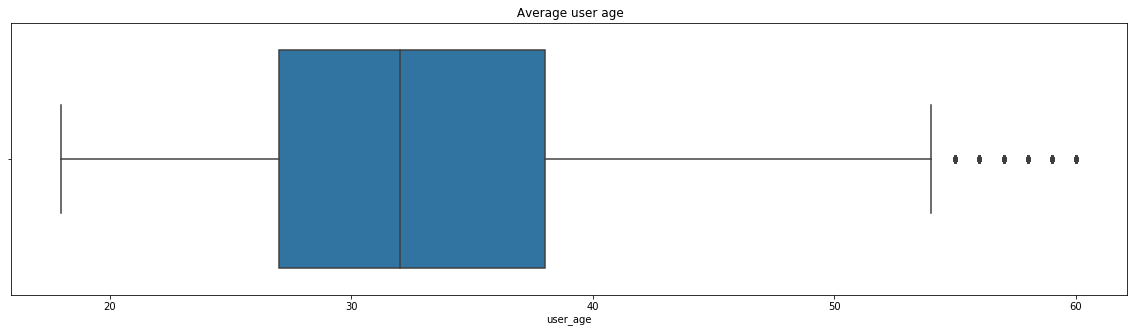

In [34]:
plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]
sns.boxplot(data=df2, x='user_age', color=base_color);
plt.title(' Average user age');
plt.savefig('img04.png');

#### The boxplot shows that, the average user_age is 35. As we can see here there are outliers in the figure.

## Number of Rides per day ?

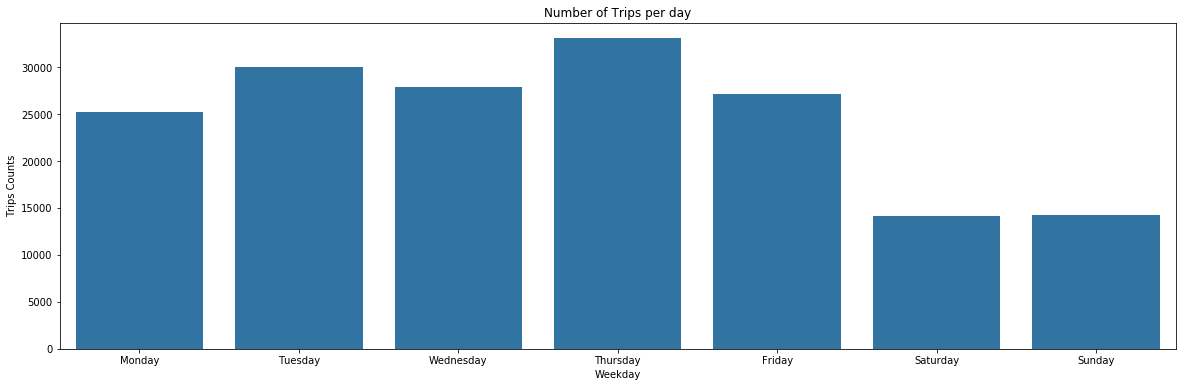

In [35]:
day_arrange = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
blue_color = sns.color_palette()[0]
plt.figure(figsize=(20,6))
sns.countplot(x='start_day_of_week',data=df2, order = day_arrange,color= blue_color)
plt.title("Number of Trips per day")
plt.xlabel('Weekday')
plt.ylabel('Trips Counts');
plt.show()
plt.savefig('img05.png');

#### The figure illustrates that,Thursday has the  highest numbers of trips while the lowest numbers of trips happen at the weekend. 

## Who use the bike more often ?

## Customer Vs subscriber

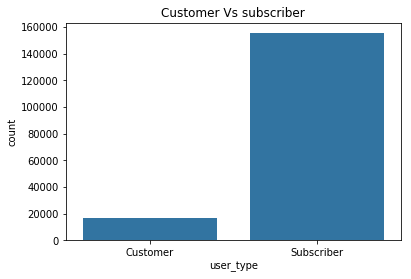

In [38]:
base_color= sns.color_palette()[0]
sns.countplot(data=df2,x='user_type',color= base_color)
plt.title('Customer Vs subscriber');
plt.savefig('img06.png');

#### The figure demonstrate that, user_type "subscribers" is greater than "customer" in using bikes

## what is the percentage of User Types ?

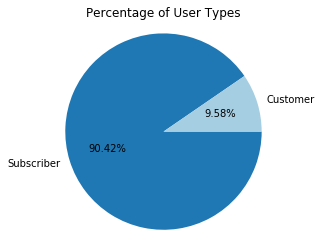

In [59]:
pie_colors= sns.color_palette('Paired')[1],sns.color_palette('Paired')[0]
client_follower_counts = df2['user_type'].value_counts()
plt.pie(sorted_counts, labels = client_follower_counts.index,colors= pie_colors,startangle = 360,autopct='%1.2f%%', counterclock = False);
plt.axis('square')
plt.title('Percentage of User Types');
plt.savefig('img07.png');

#### I plot these charts to support strongly our conclusion which is 90.4% of user type are subscribers while 9.6% are customers

## Percentage of bike users per gender?

In [60]:
#calculate percentage of trips by gender
gender_trip= df2.groupby('member_gender').agg({'bike_id':'count'})
gender_trip['perc'] = (gender_trip['bike_id']/gender_trip['bike_id'].sum())*100

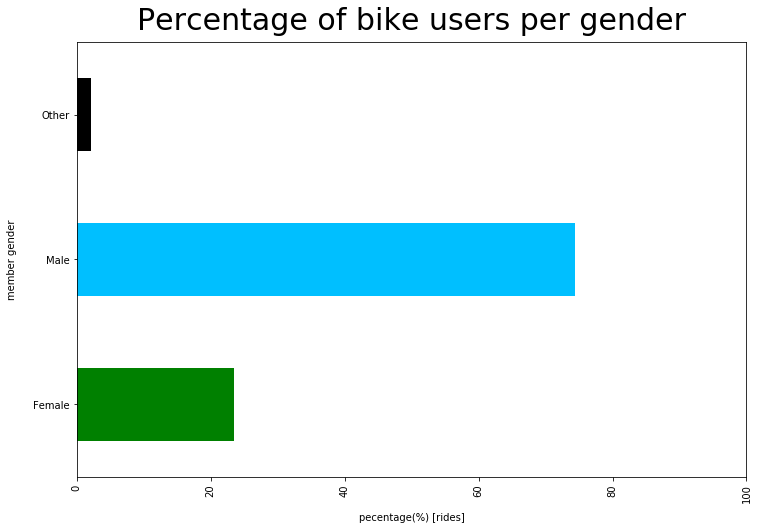

In [61]:
#plotting
unique_color = ['green', 'deepskyblue', 'black']
gender_trip['perc'].plot(kind='barh', color=unique_color, figsize=(12,8))
plt.title('Percentage of bike users per gender', fontsize=30, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=10)
plt.xticks(rotation=90)
plt.xlim(0,100)
plt.savefig('img08.png');

#### we can conclude here males use bikes more than the female.

## Percentage of Bike Rides by Age ?

In [62]:
#calculation percentage of bike trips by age
trip_age = df2.groupby('biker_age').agg({'bike_id':'count'})
trip_age['percent_age'] = (trip_age['bike_id']/trip_age['bike_id'].sum())*100

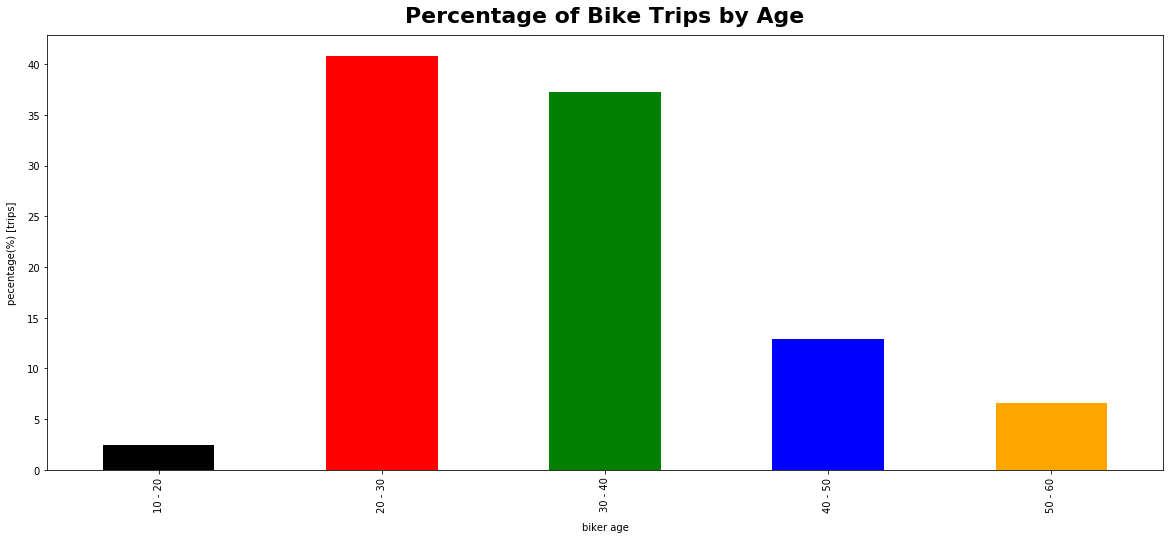

In [63]:
#plotting
unique_color = ['black', 'red', 'green', 'blue', 'orange']
trip_age['percent_age'].plot(kind='bar', color=unique_color, figsize=(20,8))
plt.title('Percentage of Bike Trips by Age', fontsize=22, y=1.015,fontweight='semibold')
plt.xlabel('biker age', labelpad=10)
plt.ylabel('pecentage(%) [trips]', labelpad=10)
plt.xticks(rotation=90)
plt.savefig('img09.png');

#### The chart shows that people who have age between 20-30 years old use bikes more than the other. Following the previous age category, people who have 30-40 years old  occupies the second place.

## Bivariate Exploration

## 1. Percentage of bike rides "subscribers vs customers"

In [64]:
sum_trips_user_type = df2.groupby('user_type').size().reset_index(name='sum')

In [65]:
sum_trips_user_type['sum']/len(df2)*100

0     9.577722
1    90.422278
Name: sum, dtype: float64

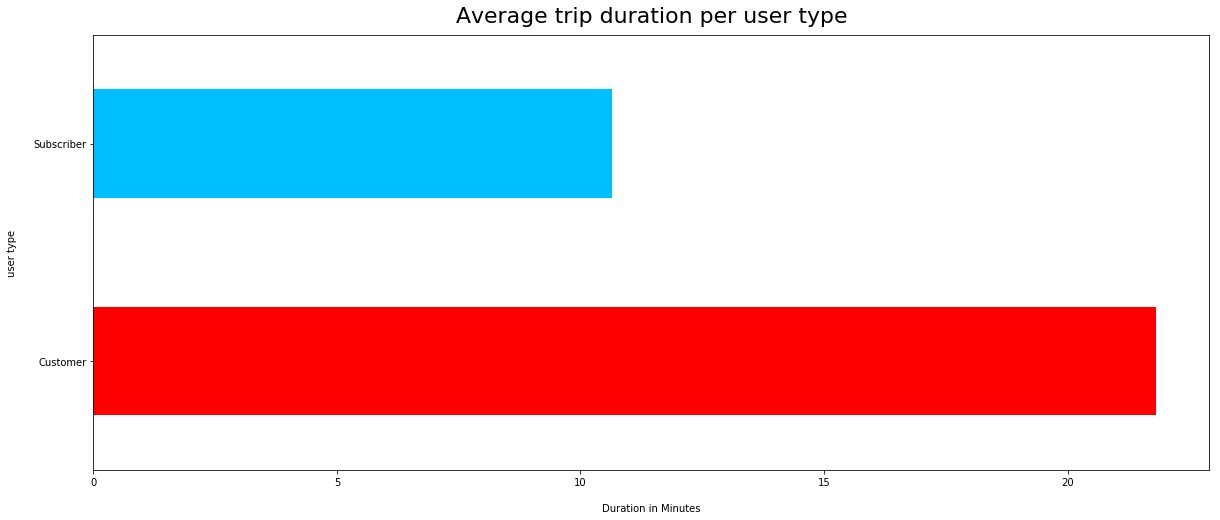

In [66]:
diff_color=['red', 'deepskyblue']
ax = df2.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=diff_color, figsize=(20,8))
ax.set_title('Average trip duration per user type', fontsize=22, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('Duration in Minutes', labelpad=16);
plt.savefig('img10.png');

#### Here we can see customers took longer time to finish the trip "more than 20 minutes" than the subscribers "10 minutes"

## Trip duration in sec per user type:

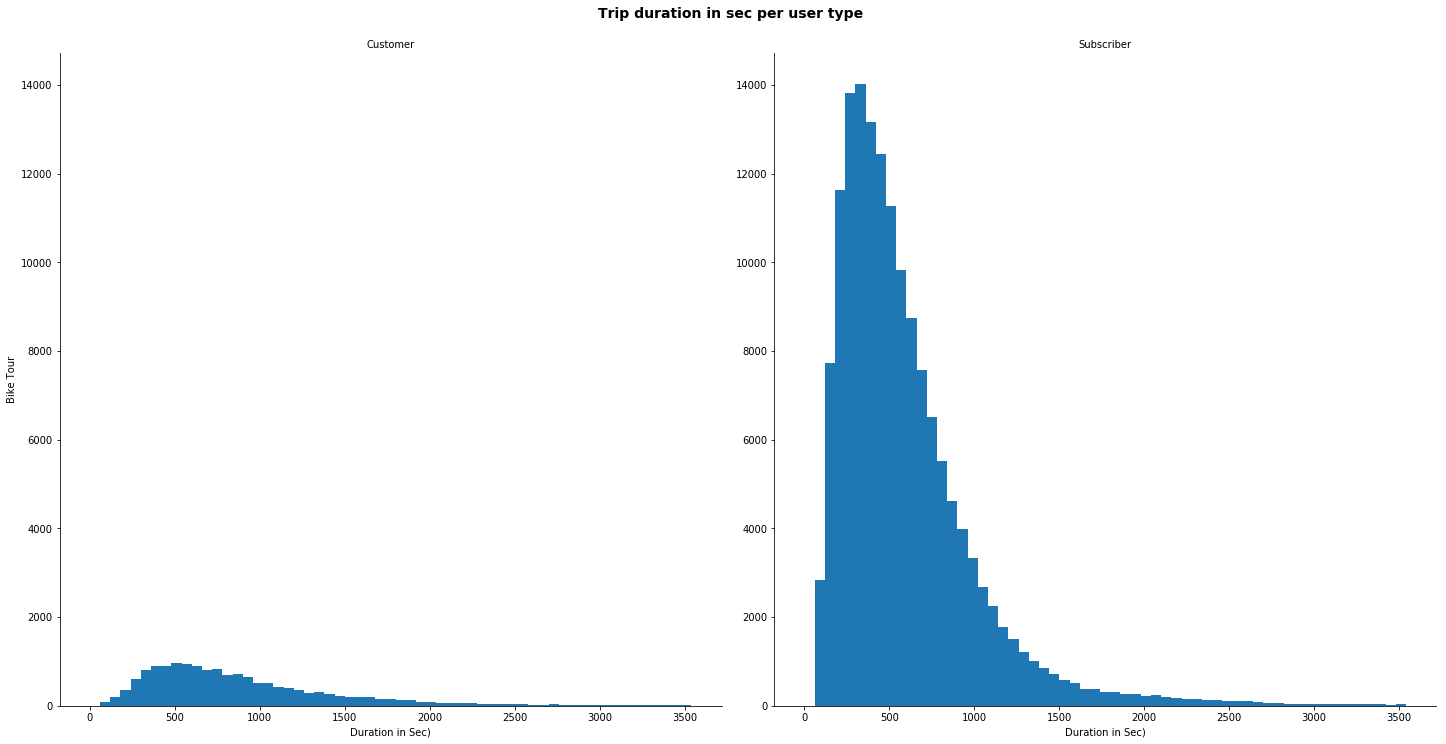

In [70]:
g = sns.FacetGrid(df2, col="user_type", margin_titles=True, size=10)
bin_size = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=sns.color_palette()[0], bins=bin_size)
g.set_axis_labels("Duration in Sec)", "Bike Tour")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration in sec per user type', y=1.03, fontsize=14, fontweight='semibold');
plt.savefig('img11.png');

#### The graph shows that subscribers make a lot of bike trips than customers,also we can see that trip durations are longer for customers (1000 sec)and there is no peak in the graph than for subscribers that have average duration around (400 sec). This can be explained by the fact that subscribers can be passengers who take short trips to work or school rather than longer trips around the Bay Area.

## Relation between day of the week and user type

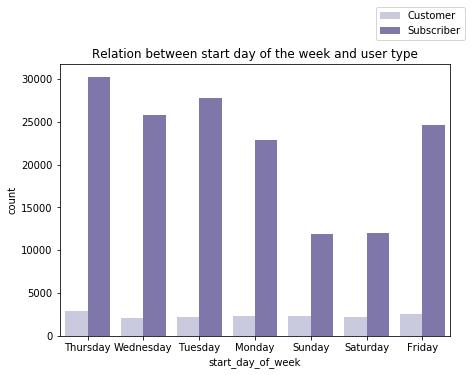

In [76]:
# plotting
plt.figure(figsize= (7,5))
sns.countplot(data= df2, hue='user_type', x= 'start_day_of_week', palette= 'Purples')
plt.legend(bbox_to_anchor=(1.05,1.07), loc=4)
plt.title('Relation between start day of the week and user type')
plt.savefig('img12.png');

#### We see again that the majority of users are subscribers the most day they rent bikes is Thursday, while customers has the lowest and same average on everyday.It seems like we have more subscribers each day than customers

## Number of Rides vs Age

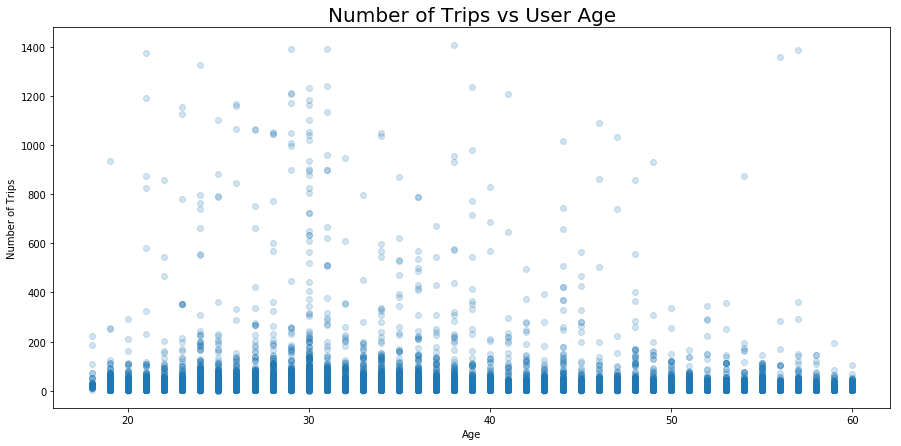

In [78]:
plt.figure(figsize = (15, 7))
plt.scatter(data = df2, x = 'user_age', y = 'duration_min', alpha = 0.2);
plt.title('Number of Trips vs User Age', fontsize = 20);
plt.xlabel('Age');
plt.ylabel('Number of Trips');
plt.savefig('img13.png');

#### here we can see the majorty of  number of rides are lying between 30 and 35 age category, also there are some outliers at the age 60. 

## Plot Relationship between user_type, weekdays and duration_min

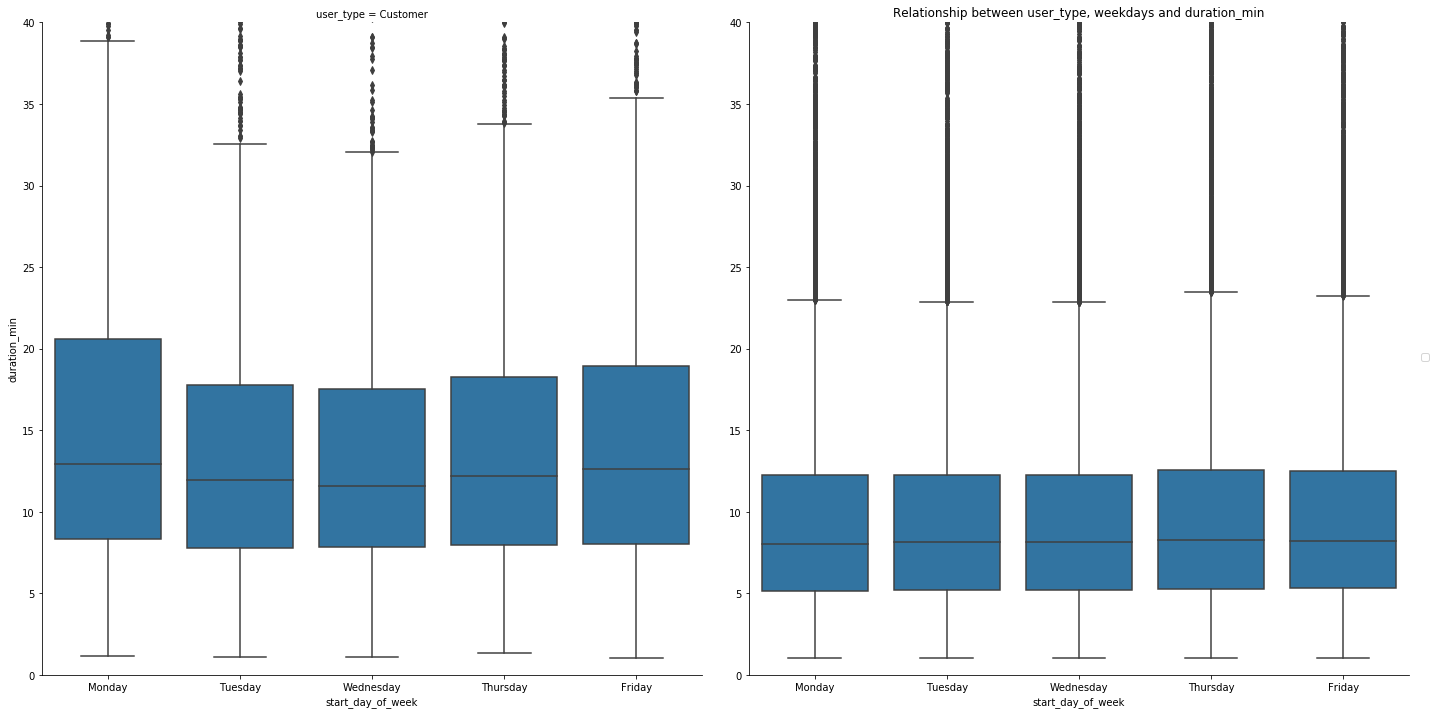

In [79]:
days=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday']
g= sns.FacetGrid(data= df2, col= 'user_type', size=10)
g.map(sns.boxplot, 'start_day_of_week', 'duration_min', order= days)
plt.ylim(0,40)
plt.title('Relationship between user_type, weekdays and duration_min')
g.add_legend()
plt.savefig('img14.png');

#### Customers on Monday and on all days like to spend more time  comparing to subscirbers . Also, the trip duration of subscribers is almost the same on all days which is around 8 mins.

## Multivariate Exploration

## Age group ,Membergender, time effects on renting a bike

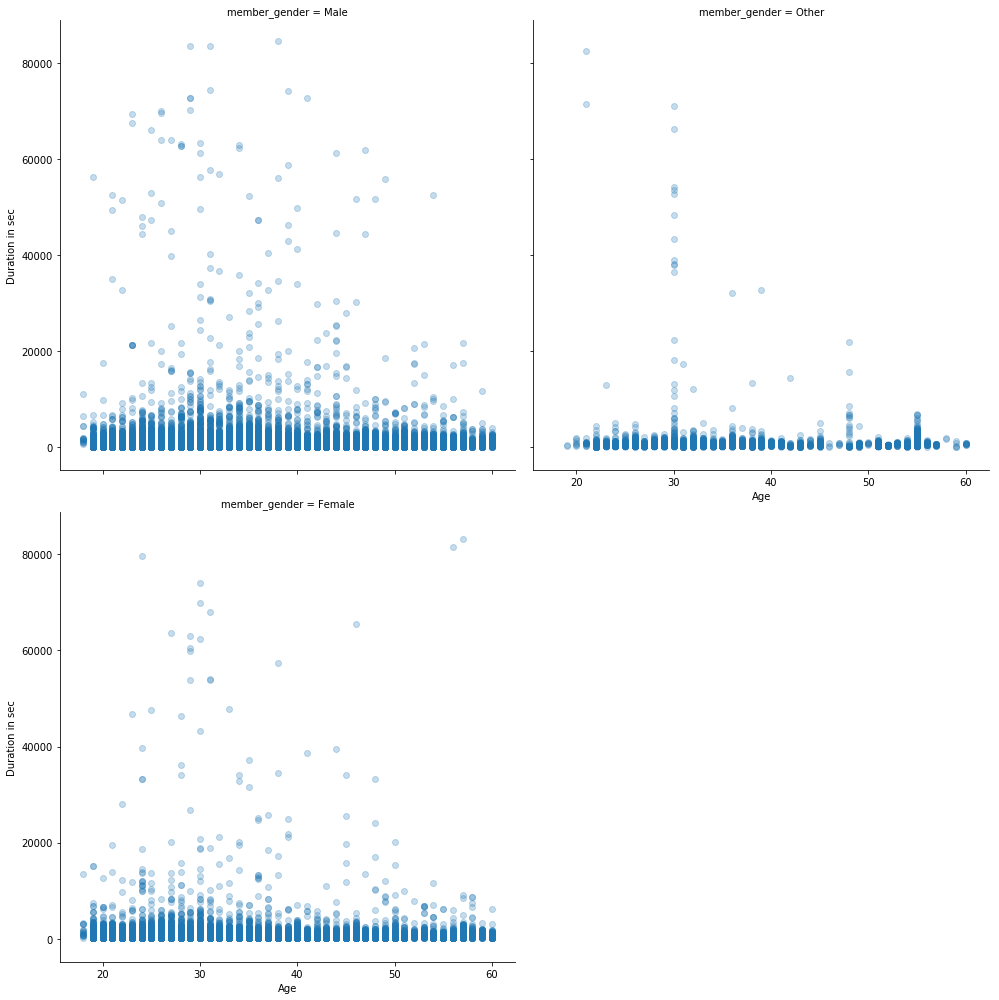

In [108]:
genre = sns.FacetGrid(data = df2, col = 'member_gender', col_wrap = 2, size = 7)
plt.xlim=[10, 80]
plt.ylim = [-300, 8000]
genre.map(plt.scatter, 'user_age', 'duration_sec', alpha=0.25)
genre.set_xlabels('Age')
genre.set_ylabels('Duration in sec')
plt.show()
plt.savefig('img15.png');

#### As we can see here Male and Female from age 20 to 35 have the highest record, in addition to that, Male from age 40 to 50 are very active comparing to female.On the other hand, others have the lowest record.

 ## Age group ,Membergender, weekdays, hour of day time effects on renting a bike

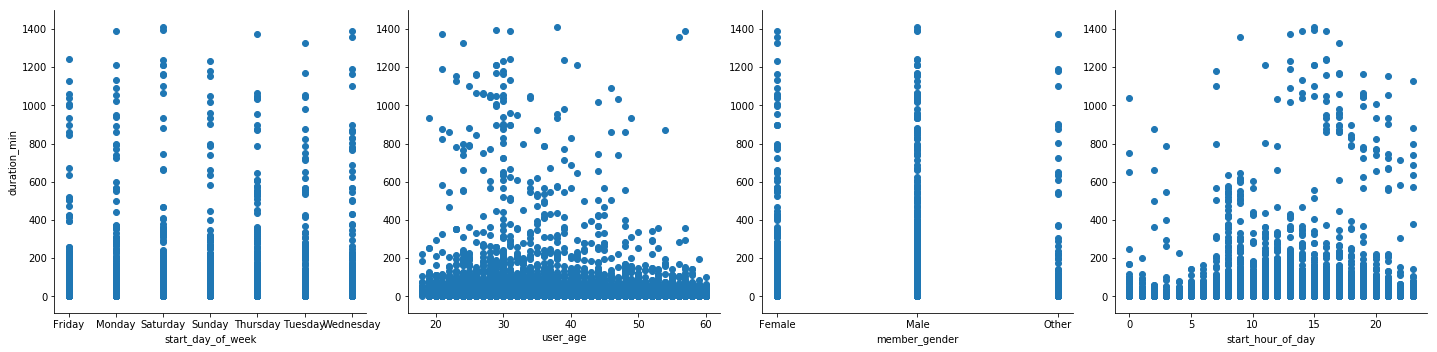

In [109]:
g=sns.PairGrid( data = df2, y_vars=['duration_min'], x_vars=['start_day_of_week','user_age', 'member_gender', 'start_hour_of_day'], size= 5)
g.map(plt.scatter);
plt.savefig('img16.png');

Here we can see male are consistently active , the user age is highly scatter btween age 25 to 35. In addition to that, on Saturday, Monday,wednesday,and Thursday the trips take longer duration.Furthermore, the long trips happen between 10 am to 3 pm. 

## Conclusion

The majority of users have 20-30 years old compared to other user groups. People hire a bike on weekdays more than weekends especially on Thursday. Percentage of subscribers is almost %90.4 while percentage of customers is almost 9.6%. Subscribers are the majority of users and their trip duration time is around 10 minutes while customers do not use bikes more often and they took along time to finish their trip , we can conclude here most of subscribers use this service for daily activity or going the same place everday like work or school.It appears that 20 to 30 years old age group use the service the most. Finally if the company want to make much more profit, it can focous on what attract customers and female gender and put it in their next campaign.

